# KNN
kNN is a non-parametric instance-based learning algorithm used for classification and regression.
It does not explicitly learn a decision boundary. Instead, predictions are based on the majority class of the k nearest neighbors in the feature space.
kNN stores all training examples and predicts the class of a new data point based on the majority class of its nearest neighbors.
kNN can be computationally expensive, especially with large datasets or high-dimensional feature spaces, because it requires computing distances to all training examples.
Cross-validation for kNN involves evaluating the model's performance by iterating through different values of k and determining the optimal value that minimizes error.
It assesses how well the model generalizes to new data by testing on different subsets of the data during cross-validation.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


In [2]:
df = pd.read_csv("data.csv") 

print (df.head) 


<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.drop(['Unnamed: 32', 'id'], axis = 1, inplace=True) 
print(df.shape) 
# convert diagnosis from categorical to binary values
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis] 

(569, 31)


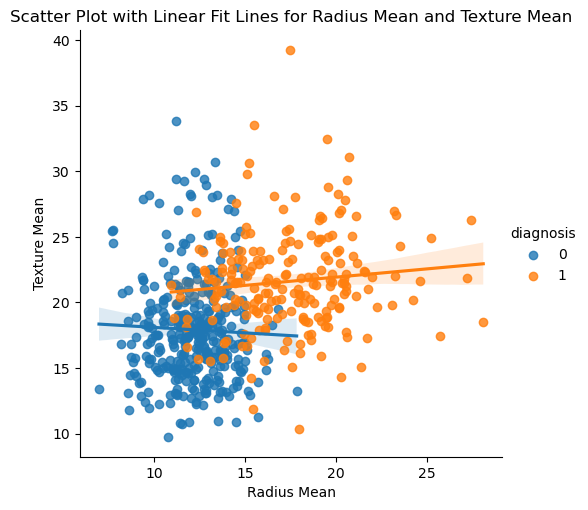

In [5]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df) 
# Display the plot
plt.title('Scatter Plot with Linear Fit Lines for Radius Mean and Texture Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.show()

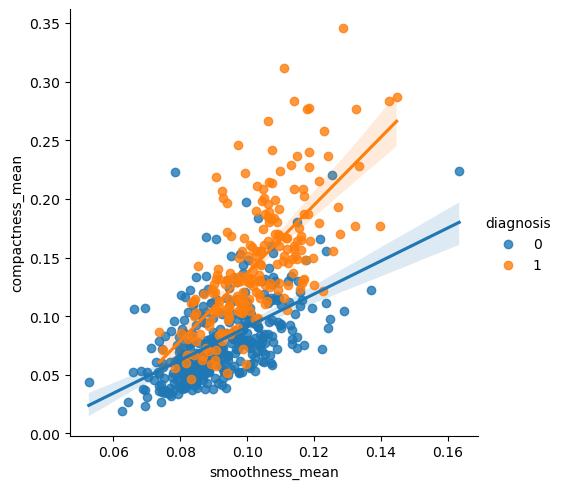

In [6]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean',  
           data = df, hue = 'diagnosis') 

In [7]:
X = np.array(df.iloc[:, 1:]) 
y = np.array(df['diagnosis']) 

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.33, random_state = 42) 

In [8]:
knn = KNeighborsClassifier(n_neighbors = 13) 
knn.fit(X_train, y_train) 


# Display the full parameters of the kNN classifier
print("kNN Classifier Parameters:\n", knn.get_params())

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and f1 score

# precision is ratio of correctly predicted positive observations to the total predicted positives
precision = precision_score(y_test, y_pred)
# recall is ratio of correctly predicted positive observations to all the observations in the actual class
recall = recall_score(y_test, y_pred)
# F1 Score is the weighted average of Precision and Recall
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

kNN Classifier Parameters:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}
Accuracy: 0.9627659574468085
Precision: 0.96875
Recall: 0.9253731343283582
F1 Score: 0.9465648854961832
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       121
           1       0.97      0.93      0.95        67

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.96       188
weighted avg       0.96      0.96      0.96       188



In [9]:
'''
k-fold cross validation works by splittin gthe dataset randomly into k equal sized folds
each fold acts as a testing set while the remaining k-1 folds are used as training sets
the model is trained on the k-1 fold while the final fold is used to evaluate
repeat for the remaining folds
compute the average performance metric across all k folds to obtain an overall estimate of the model's performance.
'''

"\nk-fold cross validation works by splittin gthe dataset randomly into k equal sized folds\neach fold acts as a testing set while the remaining k-1 folds are used as training sets\nthe model is trained on the k-1 fold while the final fold is used to evaluate\nrepeat for the remaining folds\ncompute the average performance metric across all k folds to obtain an overall estimate of the model's performance.\n"

In [10]:
neighbors = [] 
cv_scores = [] 
  
from sklearn.model_selection import cross_val_score 
# perform 10 fold cross validation 
for k in range(1, 51, 2): 
    neighbors.append(k) 
    knn = KNeighborsClassifier(n_neighbors = k) 
    scores = cross_val_score( 
        knn, X_train, y_train, cv = 10, scoring = 'accuracy') 
    cv_scores.append(scores.mean()) 

The optimal number of neighbors is 13


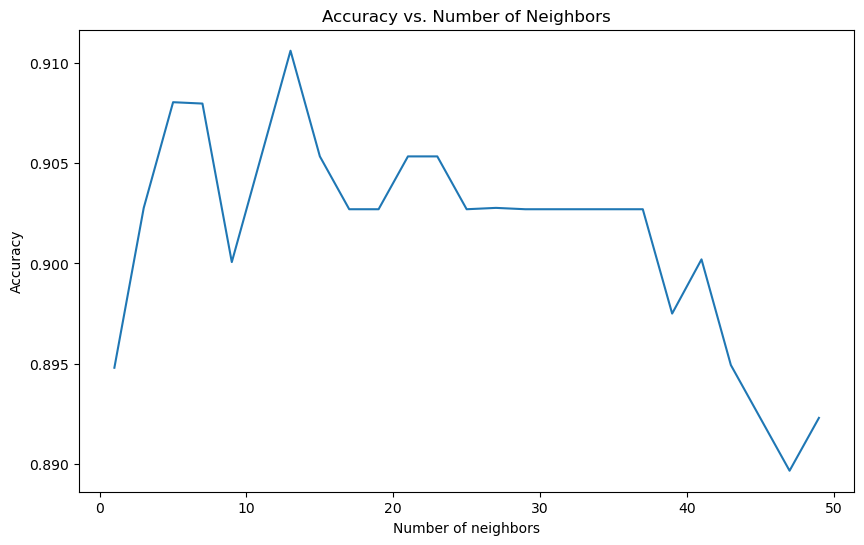

In [11]:
# determining the best k 
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print('The optimal number of neighbors is %d' % optimal_k)

# Plot accuracy versus k
plt.figure(figsize=(10, 6))
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()